# Data Description:
In this project we will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The data files contain complete loan data for all loans issued by XYZ Corp having more than 8 lakh entires through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.


# Source
This data as part of the PG-Data Science program has been provided by Imarticus Learning.



# Distribution of Train and Test
The data split into train (June 2007 - May 2015) and test (June 2015 - Dec 2015) on the column "issue_d". 
train        (598978, 145)
train_target (598978, 1)
test         (256991, 145)
test_target  (256991, 1)

# Import Required Libraries

In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd
import statistics

In [2]:
# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

ModuleNotFoundError: No module named 'missingno'

In [3]:
## Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile
from io import StringIO

# Importing the Data

In [5]:
pd.options.display.max_columns = 100
data = pd.read_csv("G:/Project/Python/XYZCorp_LendingData.txt", delimiter = '\t', low_memory = False)

In [6]:
data.shape

(855969, 73)

In [7]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [9]:
data.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


In [10]:
data.describe(include=['float64'])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.085700e+

In [11]:
data.describe(include=['int64'])

,id,member_id,default_ind
count,8.559690e+05,8.559690e+05,855969.000000
mean,3.224073e+07,3.476269e+07,0.054286
std,2.271969e+07,2.399418e+07,0.226581
min,5.473400e+04,7.069900e+04,0.000000
25%,9.067986e+06,1.079273e+07,0.000000
50%,3.431355e+07,3.697532e+07,0.000000
75%,5.446311e+07,5.803559e+07,0.000000
max,6.861687e+07,7.351969e+07,1.000000


# Missing Values

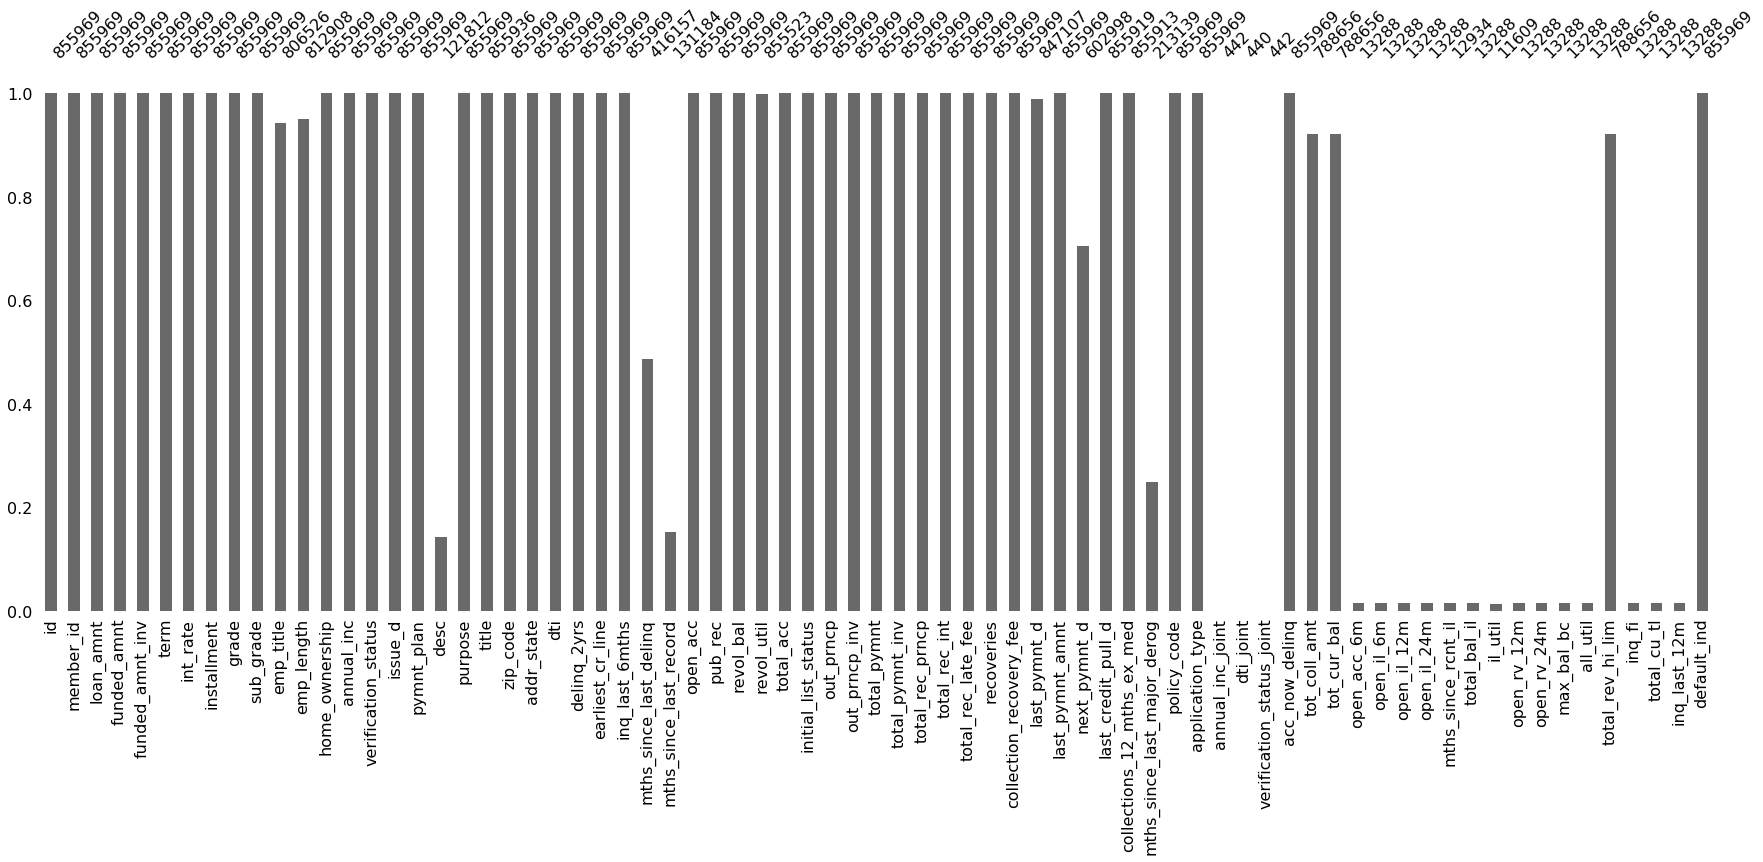

In [12]:
# How many missing values are there in our dataset?
missingno.bar(data, figsize = (30,10))

In [4]:
# Finding all the variables that have a missing values
null_in_data = data.isnull().sum()
null_in_data = null_in_data[null_in_data > 0]
null_in_data.sort_values(ascending=False,inplace=True)
null_in_data

NameError: name 'data' is not defined

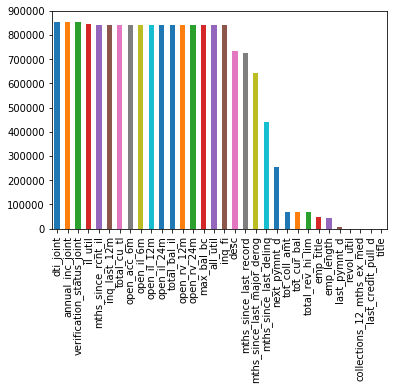

In [14]:
null_in_data.plot.bar()

In [15]:
# Caluclating the percentage of missing value to eleminate more than 10% of the missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.shape[0]).sort_values(ascending=False)*100
missingdata = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(null_in_data.shape)
missingdata.head(32)

(32,)


,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


In [16]:
#Dropping all the data having more than 10% of the missing value
drop_cols = ['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il',
           'total_bal_il','inq_last_12m','open_il_6m','open_il_24m','open_il_12m','open_rv_12m','open_rv_24m',
           'max_bal_bc','all_util','inq_fi','total_cu_tl','desc','mths_since_last_record','mths_since_last_major_derog',
           'mths_since_last_delinq','next_pymnt_d','open_acc_6m']

In [17]:
data.drop(drop_cols, axis =1, inplace=True)

In [18]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-2011,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.60,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,Jan-2016,170.08,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-2011,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,4.0,0.0,8221.0,87.50,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,Jan-2015,111.34,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-2011,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.60,13.0,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-2012,152.39,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-2011,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.50,3.0,f,0.00,0.00,1476.190000,1469.34,

In [19]:
## Numerical Variables
                                     #Median               #Mean

#data['tot_cur_bal']) =               133587.0           139766.2

#data['tot_coll_amt'] =               0.0                225.4129

#data['total_rev_hi_lim'] =           28300.0            32163.57

#data['revol_util'] =                 63.0               55.019405

#data['collections_12_mths_ex_med'] = 0.0                0.014230

## Categorical Variables

                                #MODE
#data['emp_title'] =           Teacher
#data['emp_length']=           10+ years    
#data['last_pymnt_d']=         Jan-2016   
#data['last_credit_pull_d'] =  Jan-2016
#data['title'] =               Debt consolidation

## Missing Value Imputation

In [20]:
#For Numerical Data using Mean
data['tot_cur_bal'] = data['tot_cur_bal'].fillna((data['tot_cur_bal'].mean()))
data['tot_coll_amt'] = data['tot_coll_amt'].fillna((data['tot_coll_amt'].mean()))
data['total_rev_hi_lim'] = data['total_rev_hi_lim'].fillna((data['total_rev_hi_lim'].mean()))
data['revol_util'] = data['revol_util'].fillna((data['revol_util'].mean()))
data['collections_12_mths_ex_med'] = data['collections_12_mths_ex_med'].fillna((data['collections_12_mths_ex_med'].mean()))

#For Categorical Data using Mode
data['emp_title'] = data['emp_title'].fillna(('Teacher'))
data['emp_length'] = data['emp_length'].fillna(('10+ years'))
data['title'] = data['title'].fillna(('Debt consolidation'))
data['last_pymnt_d'] = data['last_pymnt_d'].fillna(('Jan-2016'))
data['last_credit_pull_d'] = data['last_credit_pull_d'].fillna(('Jan-2016'))

data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

In [21]:
id_col = data[['id','member_id']]
data.drop(['id','member_id'], axis = 1, inplace = True)

In [22]:
data1 = data.copy()

# Splitting the variable into Date, Catagorical and Numerical

## Date

In [23]:
data1['issue_date_new'] = pd.to_datetime(data1['issue_d'], format='%b-%Y')

## Categorical

In [24]:
#checking if these variables support
print(data['earliest_cr_line'].value_counts())
print(data['last_pymnt_d'].value_counts())
print(data['last_credit_pull_d'].value_counts())

Aug-2001    6433
Aug-2000    6322
Oct-2000    6117
Oct-2001    5924
Aug-2002    5858
Sep-2000    5712
Nov-1999    5654
Oct-1999    5630
Nov-2000    5610
Sep-2002    5604
Oct-2002    5493
Sep-2001    5485
Sep-2003    5419
Aug-1999    5418
Sep-1999    5398
Jul-2001    5168
Nov-2001    5044
Aug-2003    5022
Oct-2003    5012
Mar-2001    5007
Sep-1998    4979
Dec-2000    4934
May-2001    4875
Dec-2001    4863
Dec-1999    4855
Sep-2004    4849
Jul-2000    4838
Oct-1998    4767
Jun-2001    4765
Mar-2000    4735
            ... 
May-1958       1
Oct-1957       1
Sep-1957       1
Jul-1955       1
Feb-1960       1
Aug-1946       1
Dec-1951       1
Oct-1950       1
Jul-1961       1
Mar-1955       1
May-1953       1
Mar-1958       1
Nov-1953       1
Nov-1955       1
May-1950       1
Jan-1946       1
Jan-1948       1
Dec-1959       1
Aug-1951       1
Oct-1954       1
Aug-1958       1
Apr-1958       1
Nov-1950       1
Mar-1959       1
Jun-1949       1
Apr-1960       1
Nov-1957       1
May-1957      

In [25]:
categorical_columns = [col for col in data1.columns.values if data1[col].dtype == 'object']
categorical_columns = [x for x in categorical_columns if x not in ["issue_d"]]

In [26]:
data_cat = data1[categorical_columns]

In [27]:
#data = data.drop(["earliest_cr_line"], axis =1)#Levels look consistant, value_counts>697, getdummies will be hard to clean
#data = data.drop(["last_pymnt_d"], axis =1)       #value_counts>100 +imbalanced 
#data = data.drop(["last_credit_pull_d"], axis =1) #value_counts>100 +imbalanced

In [28]:
data_cat['emp_title'] = data_cat['emp_title'].str.capitalize()
data_cat['emp_title'].value_counts()

G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Teacher                                    65448
Manager                                    14375
Owner                                       8231
Registered nurse                            7458
Supervisor                                  6670
Sales                                       5966
Driver                                      5943
Rn                                          5816
Office manager                              4548
Project manager                             4473
General manager                             4095
Truck driver                                3410
Director                                    3322
Engineer                                    3063
President                                   2958
Sales manager                               2615
Vice president                              2552
Police officer                              2519
Operations manager                          2497
Store manager                               2367
Attorney            

In [29]:
drop_cols2 = ["emp_title","title","zip_code","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]

In [30]:
data_cat.drop(drop_cols2, axis =1, inplace=True)

G:\PythonProgramme\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)
data_cat_dummies.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,...,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
"""import statsmodels.api as sm
logit_model=sm.Logit(target_temp,data_cat_dummies)
result=logit_model.fit()
print(result.summary2())"""

'import statsmodels.api as sm\nlogit_model=sm.Logit(target_temp,data_cat_dummies)\nresult=logit_model.fit()\nprint(result.summary2())'

In [33]:
#Droping off the variables have have >5% of the p value as they show no statistical evidence
#data_cat_dummies = data_cat_dummies.drop(['grade_B','grade_C','grade_D','grade_E','grade_F','grade_G','sub_grade_B1','sub_grade_B2','sub_grade_B3','sub_grade_B4','sub_grade_B5','sub_grade_C1','sub_grade_C2','sub_grade_C3','sub_grade_C4','sub_grade_C5','sub_grade_D1','sub_grade_D2','sub_grade_D3','sub_grade_D4','sub_grade_D5','sub_grade_E1','sub_grade_E2','sub_grade_E3','sub_grade_E4','sub_grade_E5','sub_grade_F1','sub_grade_F2','sub_grade_F3','sub_grade_F4','sub_grade_F5','sub_grade_G1','sub_grade_G2','sub_grade_G3','sub_grade_G4','sub_grade_G5','emp_length_2 years','emp_length_3 years','emp_length_4 years','emp_length_8 years','emp_length_9 years','pymnt_plan_y','purpose_debt_consolidation','purpose_major_purchase','purpose_house','purpose_medical','purpose_moving','purpose_other','purpose_renewable_energy','addr_state_CO','addr_state_CT','addr_state_DC','addr_state_DE','addr_state_GA','addr_state_IA','addr_state_ID','addr_state_IL','addr_state_IN','addr_state_KS','addr_state_ME','addr_state_MT','addr_state_ND','addr_state_NH','addr_state_OR','addr_state_RI','addr_state_SC','addr_state_SD','addr_state_TN','addr_state_TX','addr_state_VT','addr_state_WA','addr_state_WV','addr_state_WY','application_type_JOINT'], axis=1)

# Numerical

In [34]:
# dataframe with numerical features
data_num = data1.drop(categorical_columns, axis=1)
data_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,issue_date_new
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,Dec-2011,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0,225.412882,139766.247529,32163.574526,0,2011-12-01
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,Dec-2011,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0,225.412882,139766.247529,32163.574526,1,2011-12-01
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,Dec-2011,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0,225.412882,139766.247529,32163.574526,0,2011-12-01
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,Dec-2011,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0,225.412882,139766.247529,32163.574526,0,2011-12-01
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,Dec-2011,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0,225.412882,139766.247529,32163.574526,0,2011-12-01


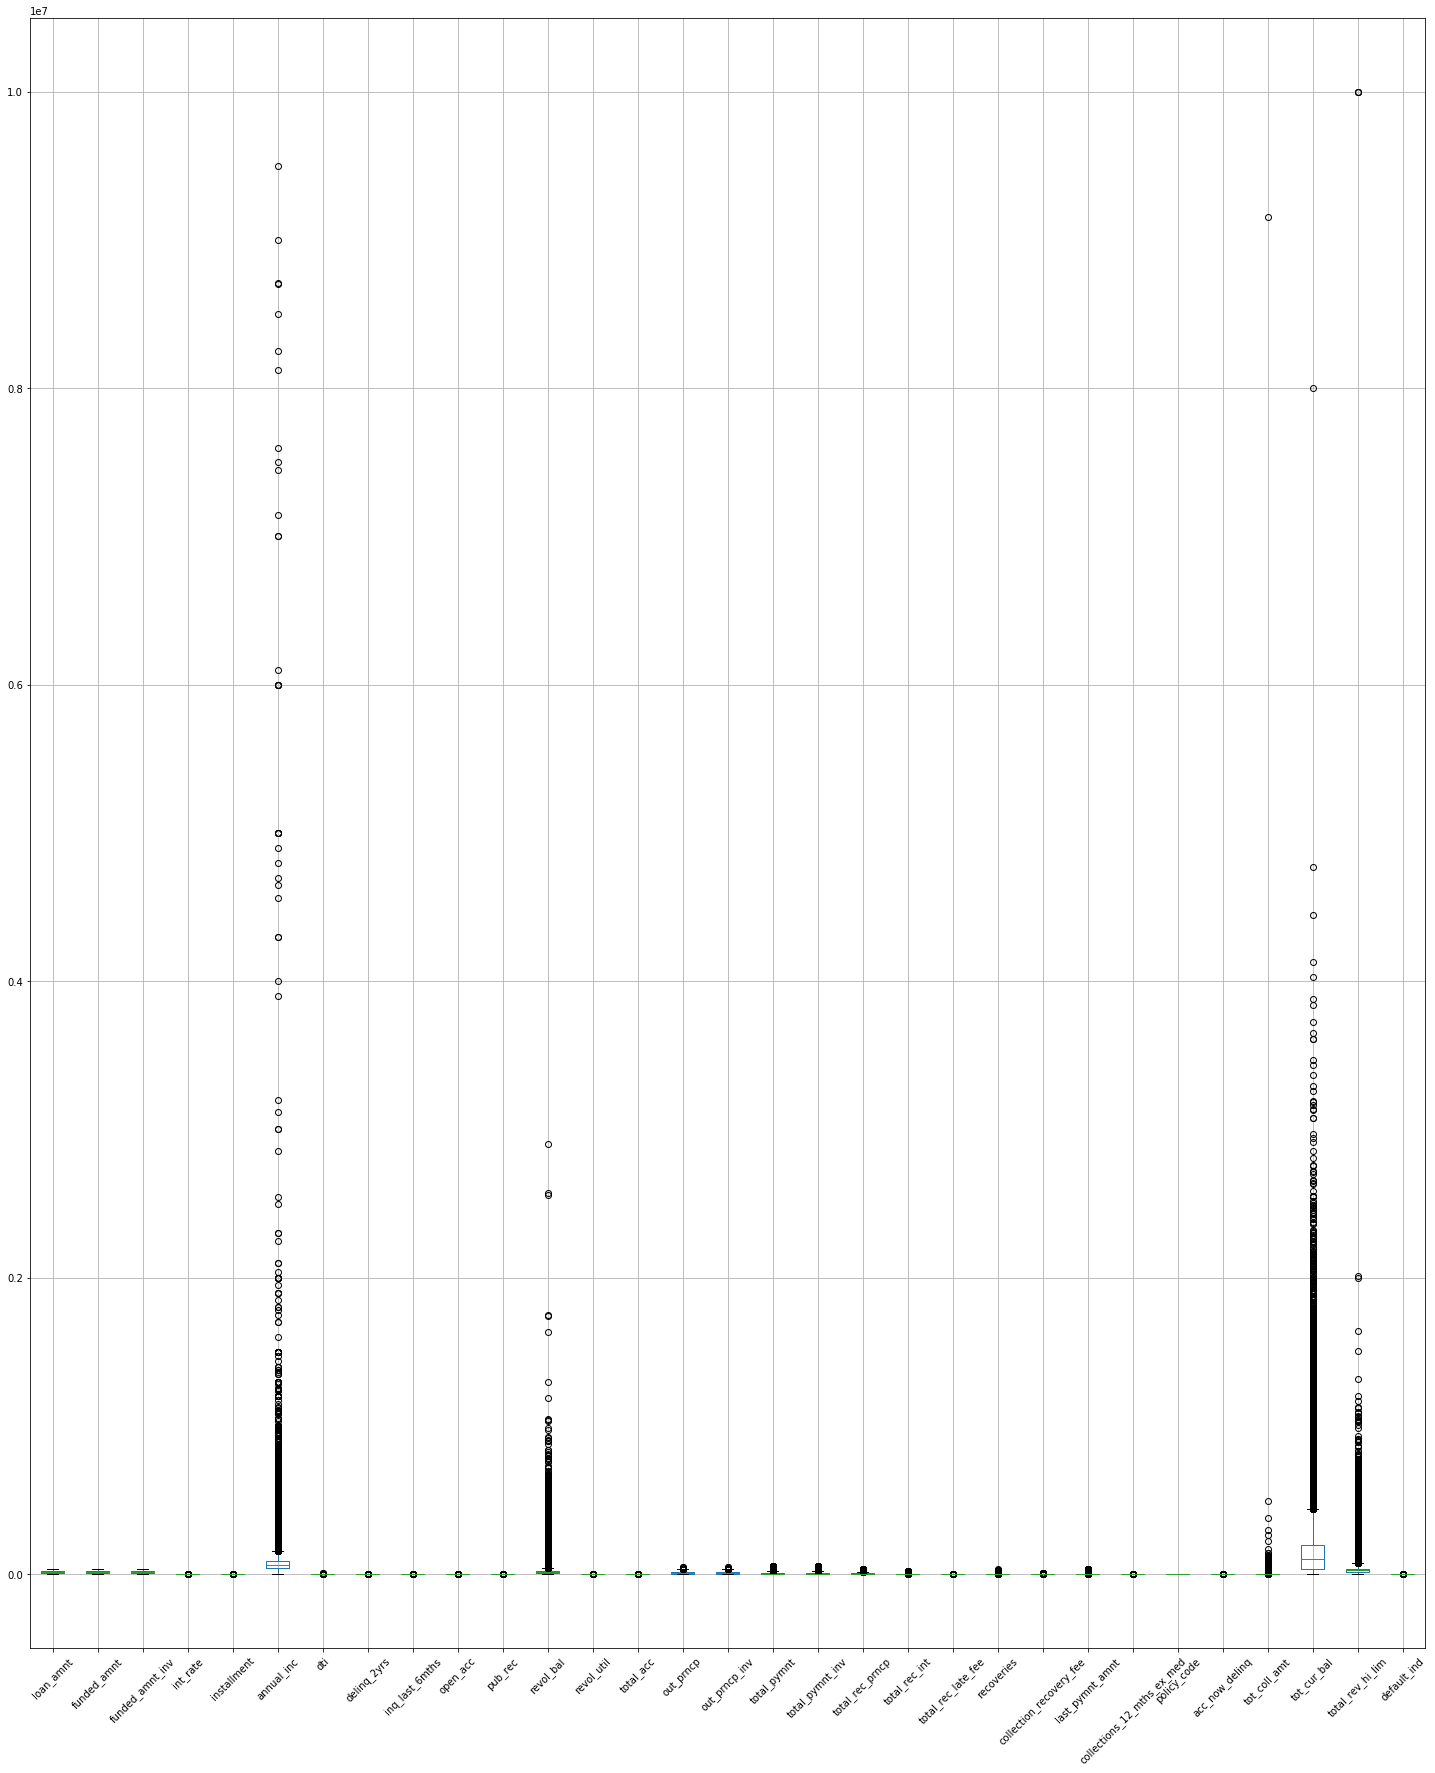

In [35]:
data_num.boxplot(figsize=(25,30),rot=45)

In [36]:
iqr=data_num.quantile([0.1,0.95])
iqr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0.10,5000.0,5000.0,5000.0,7.62,166.05,34212.0,7.44,0.0,0.0,6.0,0.0,3439.0,22.3,12.0,0.00,0.000,749.526,745.722,474.04,178.15,0.0,0.0,0.0,169.88,0.0,1.0,0.0,0.0,15439.0,8800.0,0.0
0.95,32000.0,32000.0,32000.0,20.99,903.35,150000.0,32.67,2.0,3.0,21.0,1.0,43833.0,92.4,47.0,25166.14,25155.148,24209.774,24117.640,20000.00,5868.97,0.0,0.0,0.0,13211.88,0.0,1.0,0.0,556.0,414677.6,80500.0,1.0


In [37]:
#Setting the Floor and Ceiling Values for all the outliers

data_num['loan_amnt'][data_num['loan_amnt'] < 5000] = 5000
data_num['loan_amnt'][data_num['loan_amnt'] > 32000] = 32000

data_num['funded_amnt'][data_num['funded_amnt'] < 5000] = 5000
data_num['funded_amnt'][data_num['funded_amnt'] > 32000] = 32000

data_num['funded_amnt_inv'][data_num['funded_amnt_inv'] < 5000] = 5000
data_num['funded_amnt_inv'][data_num['funded_amnt_inv'] > 32000] = 32000

data_num['int_rate'][data_num['int_rate'] < 7.62] = 7.62
data_num['int_rate'][data_num['int_rate'] > 20.99] = 20.99

data_num['installment'][data_num['installment'] < 166.05] = 166.05
data_num['installment'][data_num['installment'] > 903.35] = 903.35

data_num['annual_inc'][data_num['annual_inc'] < 34212] = 34212
data_num['annual_inc'][data_num['annual_inc'] > 150000] = 150000

data_num['dti'][data_num['dti'] < 7.44] = 7.44
data_num['dti'][data_num['dti'] > 32.67] = 32.67

data_num['delinq_2yrs'][data_num['delinq_2yrs'] < 0] = 0
data_num['delinq_2yrs'][data_num['delinq_2yrs'] > 2] = 2

data_num['inq_last_6mths'][data_num['inq_last_6mths'] < 0] = 0
data_num['inq_last_6mths'][data_num['inq_last_6mths'] > 3] = 3

data_num['open_acc'][data_num['open_acc'] < 6] = 6
data_num['open_acc'][data_num['open_acc'] > 21] = 21

data_num['pub_rec'][data_num['pub_rec'] < 0] = 0
data_num['pub_rec'][data_num['pub_rec'] > 1] = 1

data_num['revol_bal'][data_num['revol_bal'] < 3439] = 3439
data_num['revol_bal'][data_num['revol_bal'] > 43833] = 43833

data_num['revol_util'][data_num['revol_util'] < 22.3] = 22.3
data_num['revol_util'][data_num['revol_util'] > 92.4] = 92.4

data_num['total_acc'][data_num['total_acc'] < 12] = 12
data_num['total_acc'][data_num['total_acc'] > 47] = 47

data_num['out_prncp'][data_num['out_prncp'] < 0] = 0
data_num['out_prncp'][data_num['out_prncp'] > 25166.14] = 25166.14

data_num['out_prncp_inv'][data_num['out_prncp_inv'] < 0] = 0
data_num['out_prncp_inv'][data_num['out_prncp_inv'] > 25155.14] = 25155.14

data_num['total_pymnt'][data_num['total_pymnt'] < 749.5] = 749.5
data_num['total_pymnt'][data_num['total_pymnt'] > 24209.77] = 24209.77

data_num['total_pymnt_inv'][data_num['total_pymnt_inv'] < 745.7] = 745.7
data_num['total_pymnt_inv'][data_num['total_pymnt_inv'] > 24117.6] = 24117.6

data_num['total_rec_prncp'][data_num['total_rec_prncp'] < 474] = 474
data_num['total_rec_prncp'][data_num['total_rec_prncp'] > 2000] = 20000

data_num['total_rec_int'][data_num['total_rec_int'] < 178.15] = 178.15
data_num['total_rec_int'][data_num['total_rec_int'] > 5868.97] = 5868.97

data_num = data_num.drop(["total_rec_late_fee"], axis =1)

data_num = data_num.drop(["recoveries"], axis =1)

data_num = data_num.drop(["collection_recovery_fee"], axis =1)

data_num['last_pymnt_amnt'][data_num['last_pymnt_amnt'] < 169.88] = 169.88
data_num['last_pymnt_amnt'][data_num['last_pymnt_amnt'] > 13211.88] = 13211.88

data_num = data_num.drop(["collections_12_mths_ex_med"], axis =1)

data_num = data_num.drop(["policy_code"], axis =1)

data_num = data_num.drop(["acc_now_delinq"], axis =1)

data_num['tot_coll_amt'][data_num['tot_coll_amt'] < 0] = 0
data_num['tot_coll_amt'][data_num['tot_coll_amt'] > 556] = 556

data_num['tot_cur_bal'][data_num['tot_cur_bal'] < 15439] = 15439
data_num['tot_cur_bal'][data_num['tot_cur_bal'] > 414677.6] = 414677.6

data_num['total_rev_hi_lim'][data_num['total_rev_hi_lim'] < 8800] = 8800
data_num['total_rev_hi_lim'][data_num['total_rev_hi_lim'] > 80500] = 80500

G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
G:\PythonProgramme\lib\site-packages\ipykernel_

G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\PythonProgramme\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

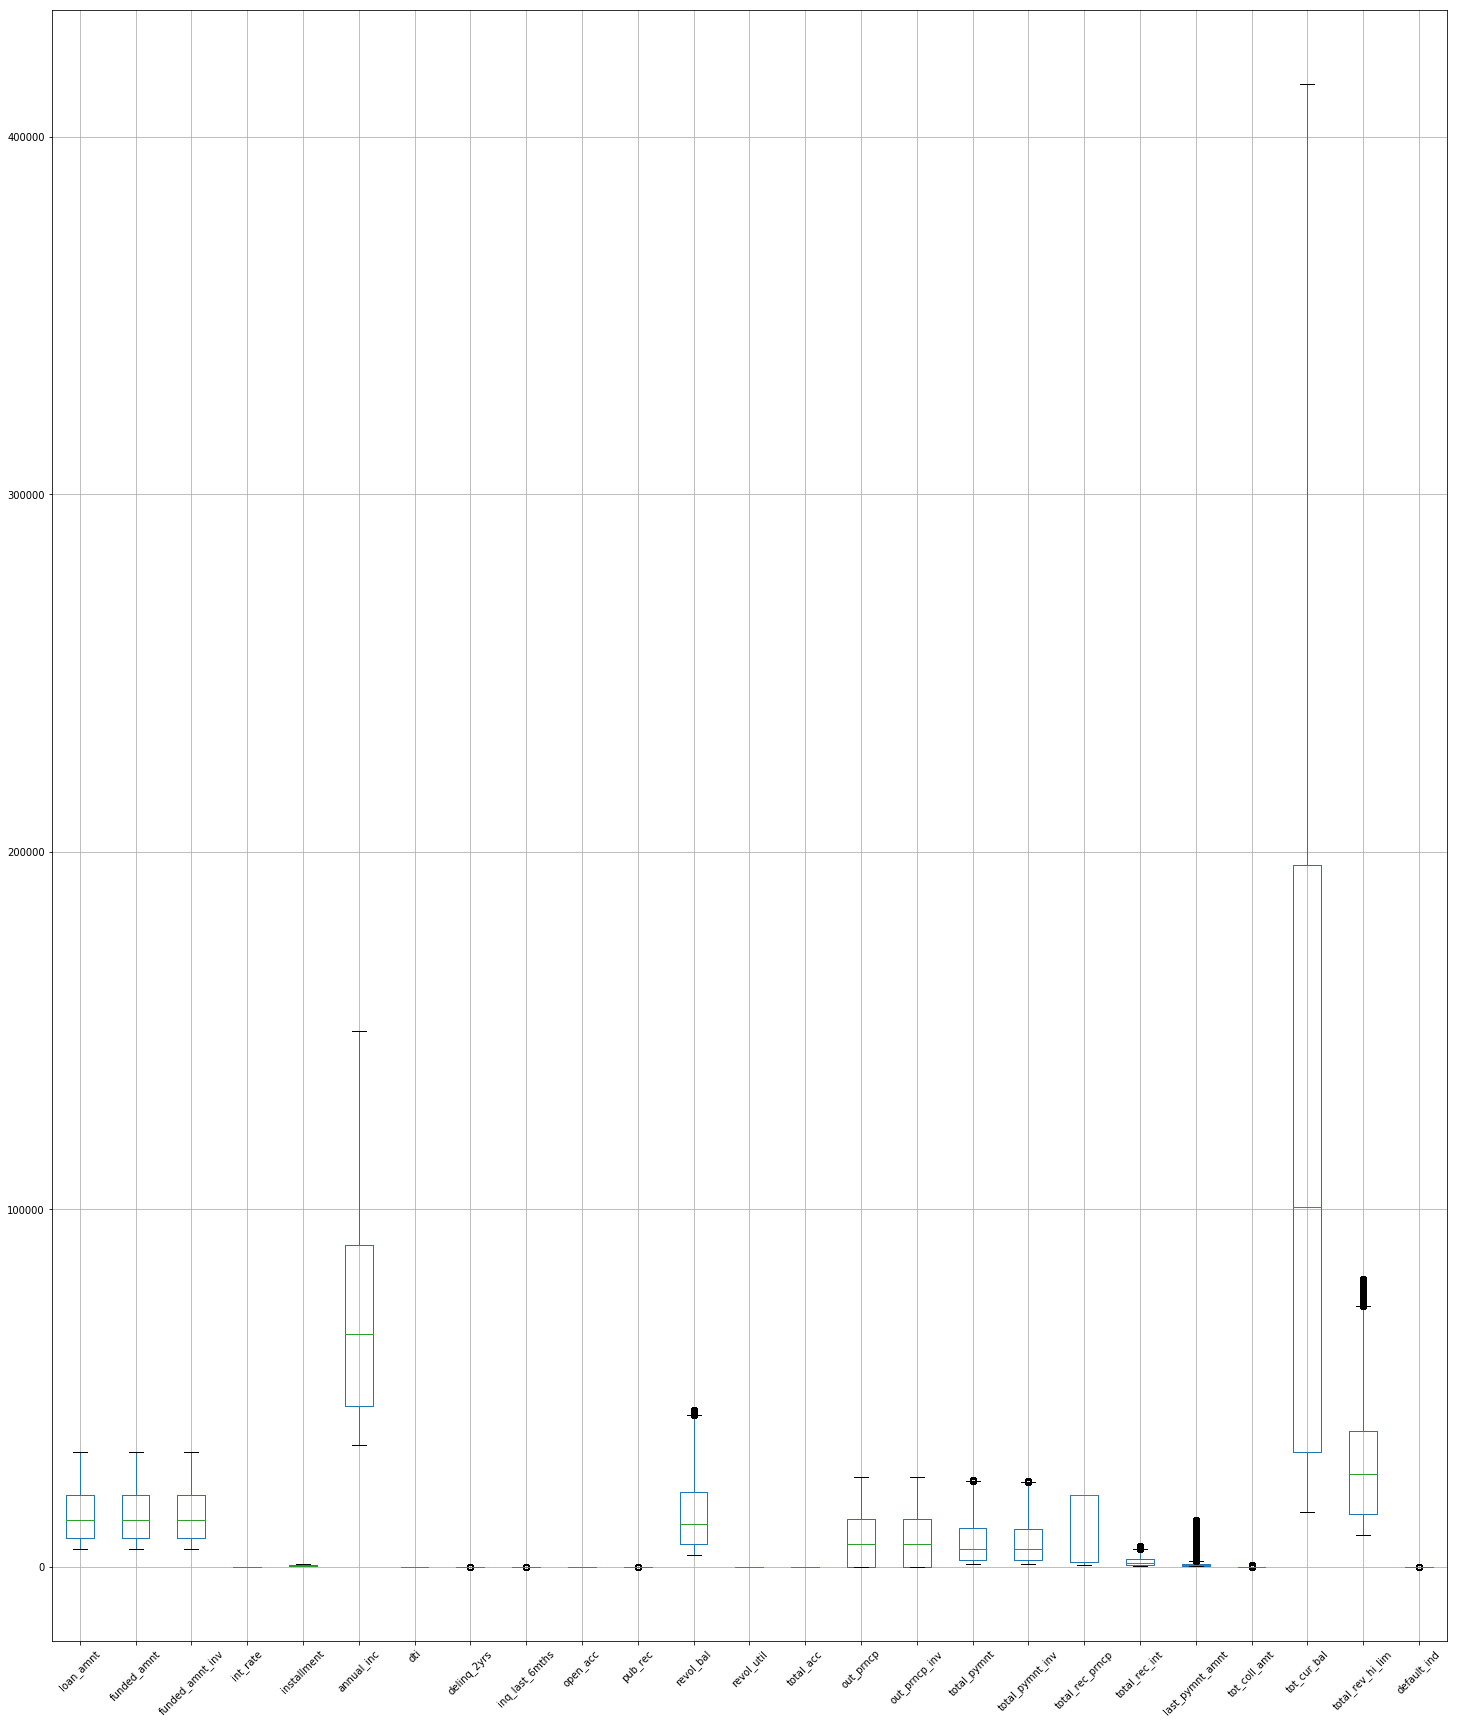

In [38]:
data_num.boxplot(figsize=(25,30),rot=45)

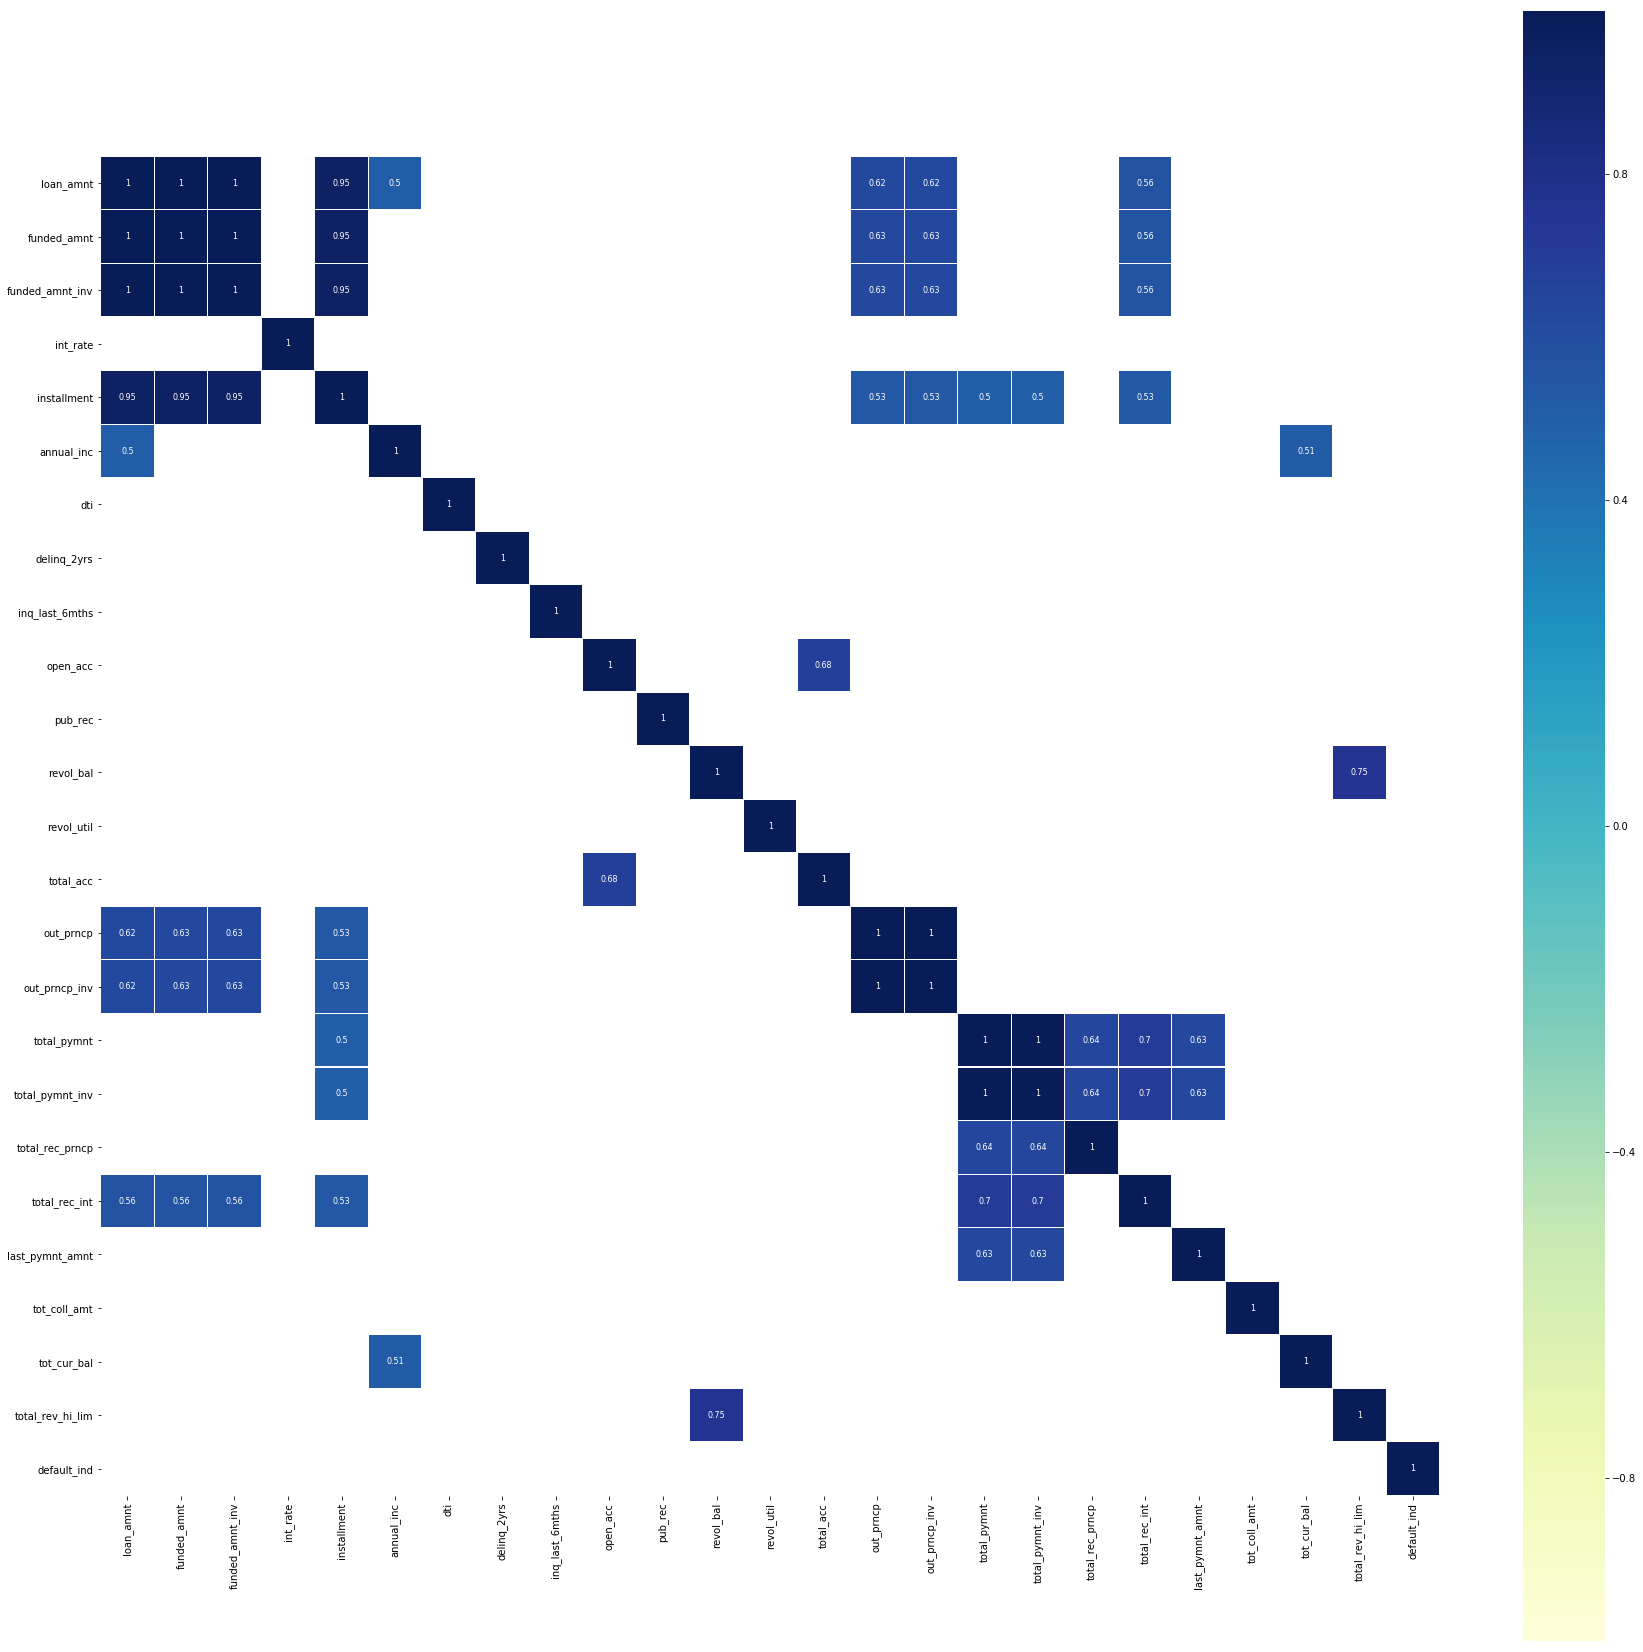

In [39]:
#checking for correlation between the numeric variables

corr=data_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [40]:
# We see multi collinearity betweeen a few variables, so we drop the ones that isnt required
drop_cols3 = ["funded_amnt","funded_amnt_inv","out_prncp_inv","total_pymnt_inv"]
data_num.drop(drop_cols3, axis =1, inplace=True)

In [41]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)
newdata.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,issue_date_new,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,...,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
0,5000.0,10.65,166.05,34212.0,Dec-2011,27.65,0.0,1.0,6.0,0.0,13648.0,83.7,12.0,0.0,5861.071414,20000.0,861.07,171.62,225.412882,139766.247529,32163.574526,0,2011-12-01,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5000.0,15.27,166.05,34212.0,Dec-2011,7.44,0.0,3.0,6.0,0.0,3439.0,22.3,12.0,0.0,1008.710000,474.0,435.17,169.88,225.412882,139766.247529,32163.574526,1,2011-12-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5000.0,15.96,166.05,34212.0,Dec-2011,8.72,0.0,2.0,6.0,0.0,3439.0,92.4,12.0,0.0,3003.653644,20000.0,603.65,649.91,225.412882,139766.247529,32163.574526,0,2011-12-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,13.49,339.31,49200.0,Dec-2011,20.00,0.0,1.0,10.0,0.0,5598.0,22.3,37.0,0.0,12226.302212,20000.0,2209.33,357.48,225.412882,139766.247529,32163.574526,0,2011-12-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5000.0,12.69,166.05,80000.0,Dec-2011,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,3242.170000,20000.0,1009.07,169.88,225.412882,139766.247529,32163.574526,0,2011-12-01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# removing original issue_d column
newdata.drop('issue_d', axis=1, inplace=True)

# Correlation

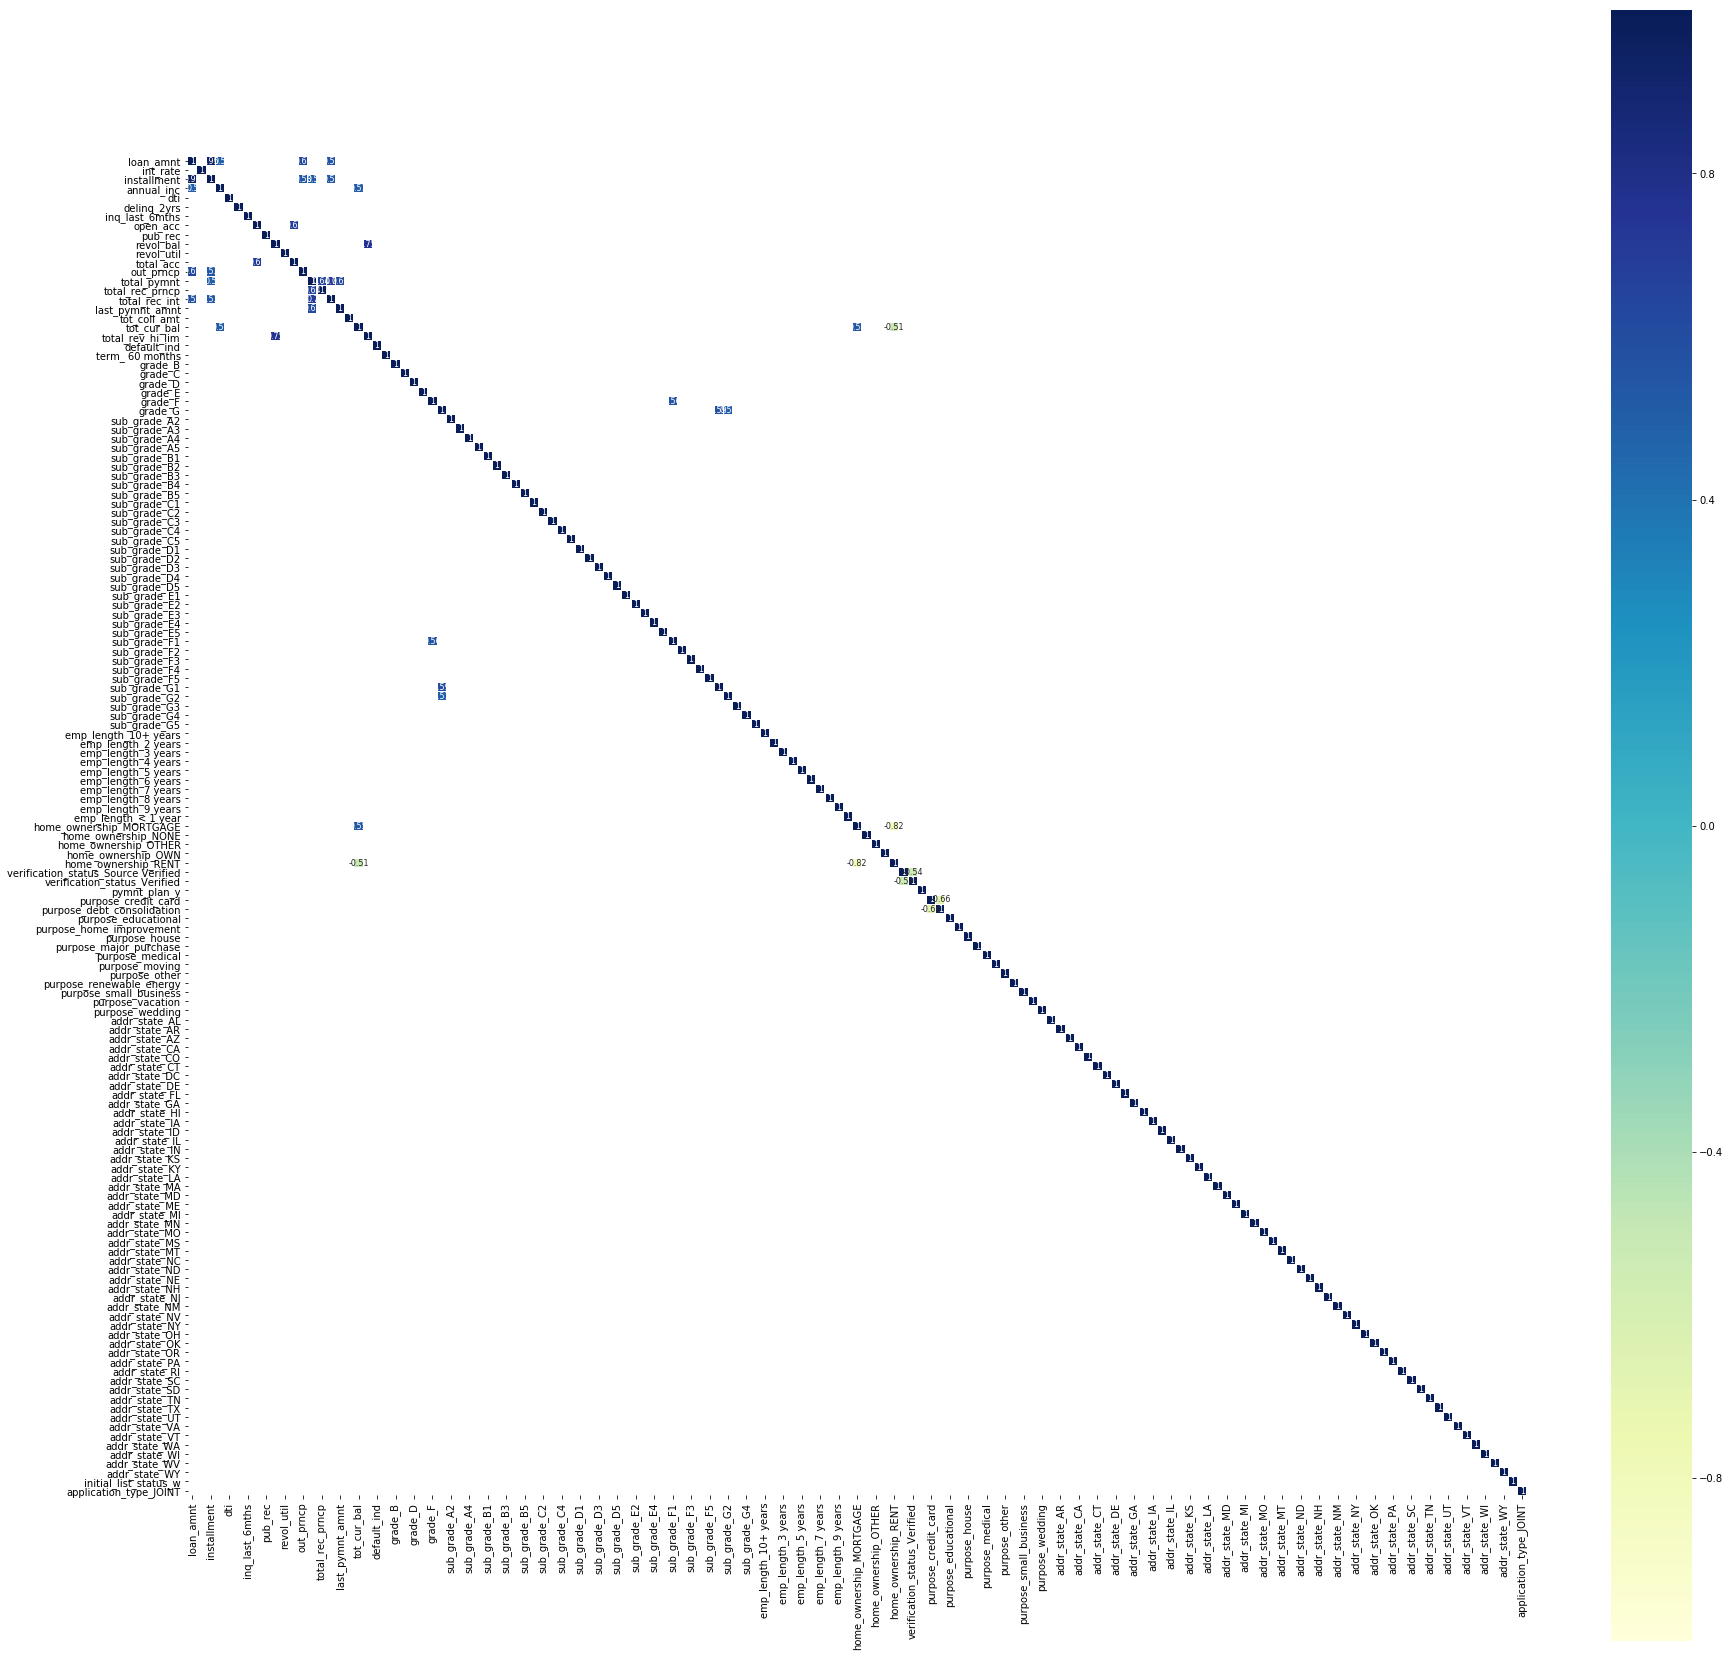

In [43]:
# Checking for overall correlation

corr=newdata.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [44]:
#target = pd.DataFrame(newdata['default_ind_1'])
#newdata = newdata.drop(['default_ind_1'], axis =1)

In [73]:
newdata.default_ind = newdata.default_ind.astype(float)

In [74]:
newdata['default_ind'].describe()

count    855969.000000
mean          0.054286
std           0.226581
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default_ind, dtype: float64

# Splitting the Data into Train and Test

In [75]:
# train test split
train_data = newdata[(newdata.issue_date_new>= '2007-06-01') & (newdata.issue_date_new< '2015-06-01')]
test_data = newdata[(newdata.issue_date_new>= '2015-06-01') ]

train_target = train_data[['default_ind']]
test_target = test_data[['default_ind']]

train_data.drop("default_ind" , axis=1, inplace=True)
test_data.drop("default_ind" , axis=1, inplace=True)

In [76]:
print("train ",train_data.shape)
print("train_target",train_target.shape)

print("test ",test_data.shape)
print("test_target ",test_target.shape)

train  (598978, 145)
train_target (598978, 1)
test  (256991, 145)
test_target  (256991, 1)


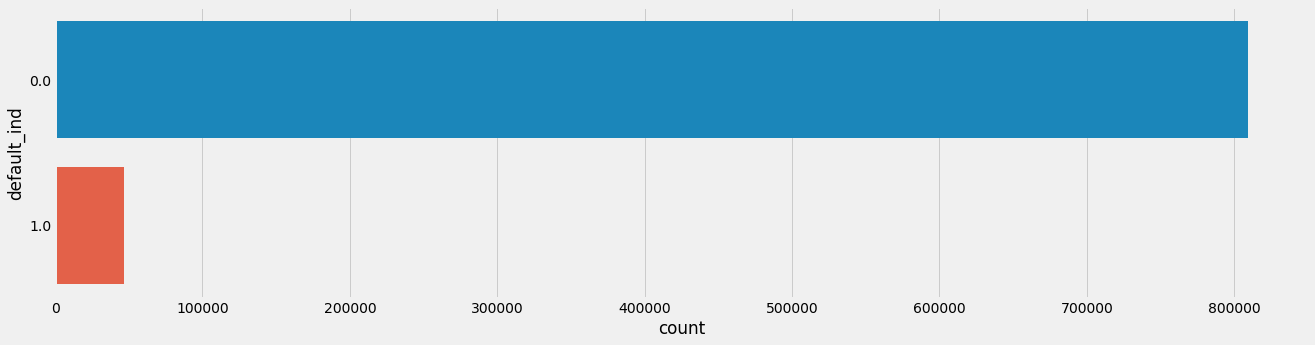

In [77]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="default_ind", data=newdata);

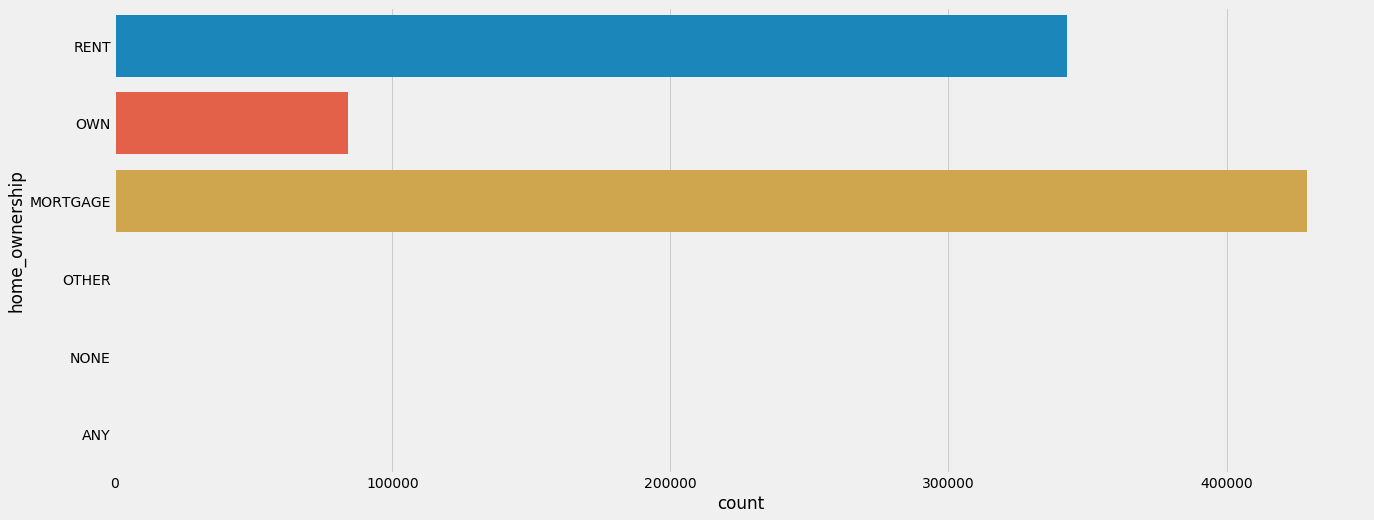

In [78]:
fig = plt.figure(figsize=(20,8)) 
sns.countplot(y="home_ownership", data=data);

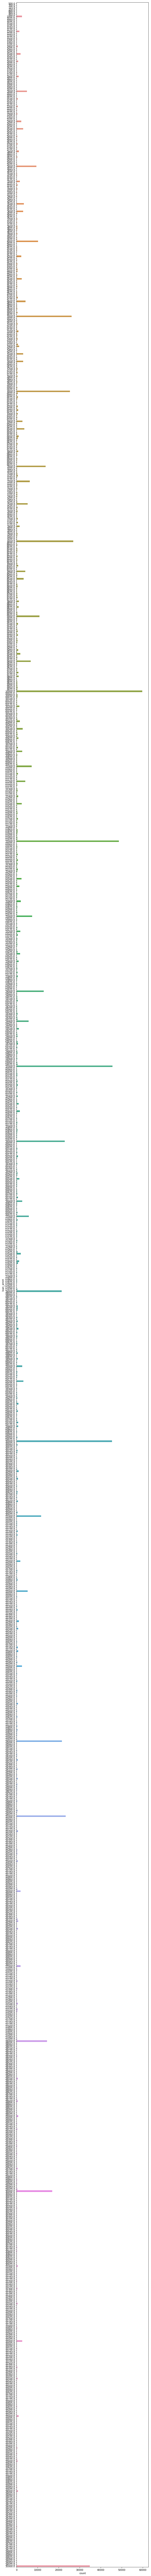

In [56]:
plt.figure(figsize=(10,200)) 
sns.countplot(y="loan_amnt", data=data);

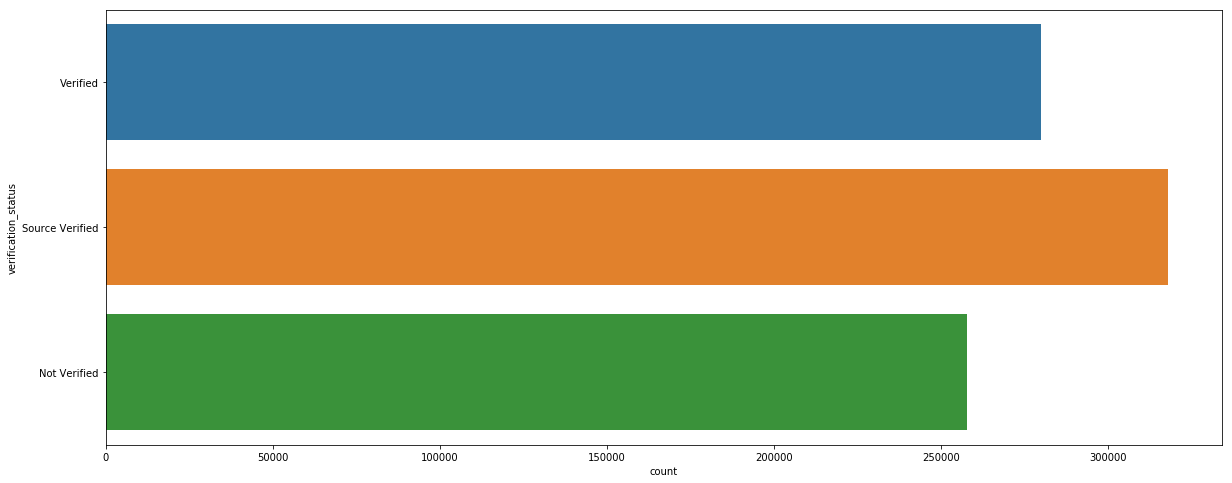

In [57]:
fig = plt.figure(figsize=(20,8)) 
sns.countplot(y="verification_status", data=data);

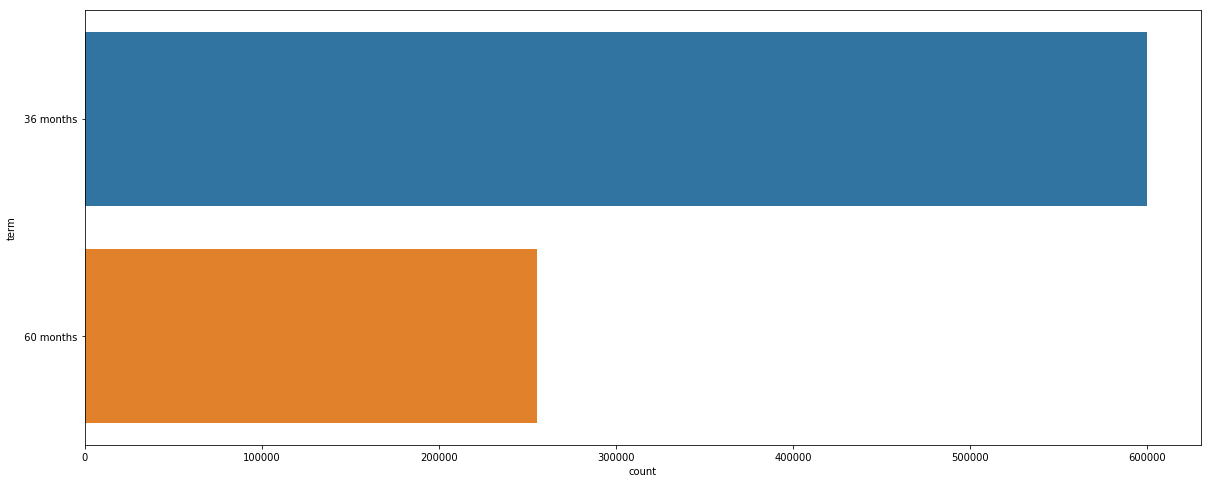

In [58]:
fig = plt.figure(figsize=(20,8)) 
sns.countplot(y="term", data=data);

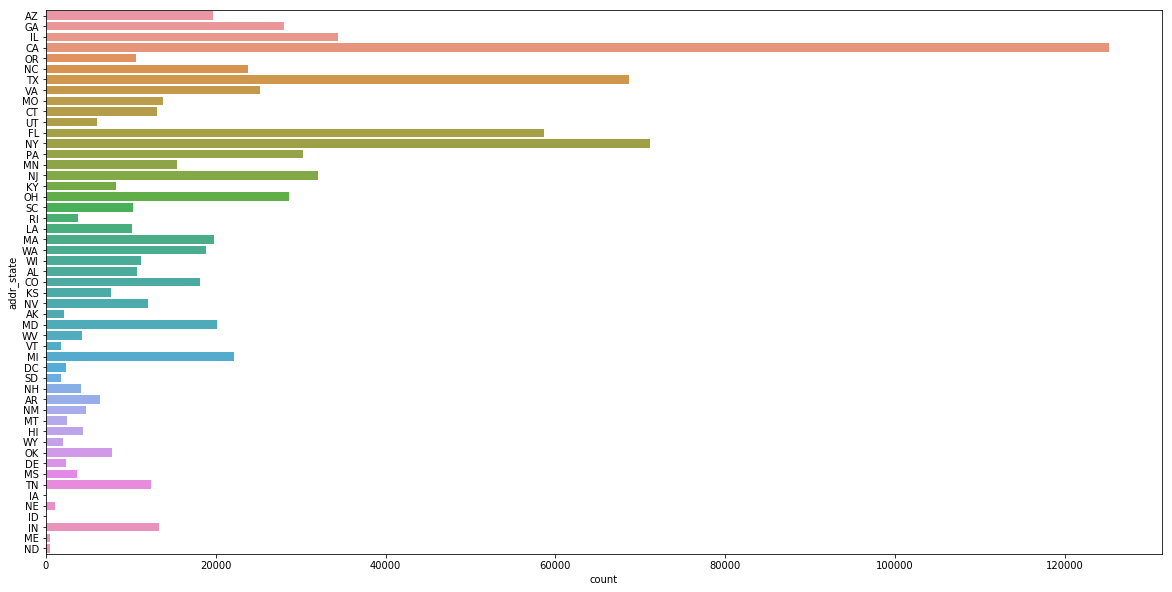

In [61]:
fig = plt.figure(figsize=(20,10)) 
sns.countplot(y="addr_state", data=data);                    

# Checking for Imbalance

In [79]:
train_target.default_ind.value_counts()/train_target.shape[0]

0.0    0.922942
1.0    0.077058
Name: default_ind, dtype: float64

In [80]:
test_target.default_ind.value_counts()/test_target.shape[0]

0.0    0.99879
1.0    0.00121
Name: default_ind, dtype: float64

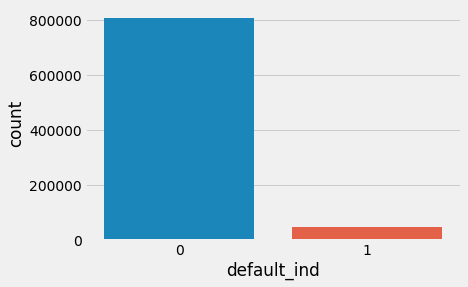

In [81]:
output = data['default_ind']
sns.countplot(output)

In [82]:
pd.value_counts(output)

0    809502
1     46467
Name: default_ind, dtype: int64

# SMOTE

In [83]:
train_target['default_ind'].value_counts()

0.0    552822
1.0     46156
Name: default_ind, dtype: int64

In [84]:
#!pip install imblearn

In [85]:
train_data.drop('issue_date_new', axis=1, inplace=True)
test_data.drop('issue_date_new', axis=1, inplace=True)

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

train_new, train_target_new = sm.fit_sample(train_data, train_target)

print('After OverSampling, the shape of train_X: {}'.format(train_new.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(train_target_new.shape))

After OverSampling, the shape of train_X: (1105644, 144)
After OverSampling, the shape of train_y: (1105644,) 



In [87]:
print("0    {}".format(sum(train_target_new==0)))
print("1    {}".format(sum(train_target_new==1)))

0    552822
1    552822


Imbalance in the test data

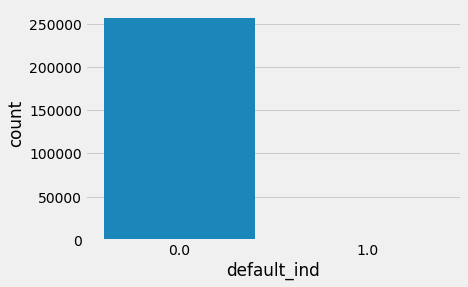

In [88]:
sns.countplot(test_target['default_ind'])

In [89]:
test_target['default_ind'].value_counts()

0.0    256680
1.0       311
Name: default_ind, dtype: int64

# Model Building

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)

#Train the model
classifier.fit(train_new, train_target_new)

G:\PythonProgramme\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
y_pred = classifier.predict(test_data)

In [74]:
y_pred=pd.DataFrame(y_pred)
y_pred.columns = ["predictions"]

In [75]:
y_pred.predictions.value_counts()

0    251289
1      5702
Name: predictions, dtype: int64

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target,y_pred.predictions)
print(cm)

[[251228   5452]
 [    61    250]]


In [77]:
from sklearn.metrics import classification_report

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.04      0.80      0.08       311

   micro avg       0.98      0.98      0.98    256991
   macro avg       0.52      0.89      0.54    256991
weighted avg       1.00      0.98      0.99    256991



In [78]:
# Accuracy
251228/(251228+5452)*100

97.87595449587035

In [90]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    # pass predicted value preds, and actual values y_test to the function 
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    # calculated fpr and tpr and threshold
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [91]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, train_new, train_target_new, test_data, cv):
    # One Pass
    # training the model
    model = algo.fit(train_new, train_target_new)
    # doing class prediction using above trained model on test dataset
    test_pred = model.predict(test_data)
    #  doing probability prediction for different classes using above trained model on test dataset
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(test_data)[:,1]
    else:
        probs = "Not Available"
    # calculating model accuracy
    acc = round(model.score(test_data, test_target) * 100, 2) 
    # Performing n-fold Cross validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  train_new, 
                                                  train_target_new, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # checking cross validation accuracy on the train dataset
    acc_cv = round(metrics.accuracy_score(train_target_new, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [92]:
#train  (598978, 145) = X_train
#train_target (598978, 1) = y_train
#test  (256991, 145) = X_test
#test_target  (256991, 1) = y_test

In [93]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 train_new, 
                                                                 train_target_new, 
                                                                 test_data, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 97.85
Accuracy CV 10-Fold: 96.16
Running Time: 0:05:02.154976


In [94]:
print (metrics.classification_report(train_target_new, train_pred_log))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    552822
         1.0       0.96      0.96      0.96    552822

   micro avg       0.96      0.96      0.96   1105644
   macro avg       0.96      0.96      0.96   1105644
weighted avg       0.96      0.96      0.96   1105644



In [95]:
print (metrics.classification_report(test_target, test_pred_log))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    256680
         1.0       0.04      0.80      0.08       311

   micro avg       0.98      0.98      0.98    256991
   macro avg       0.52      0.89      0.54    256991
weighted avg       1.00      0.98      0.99    256991



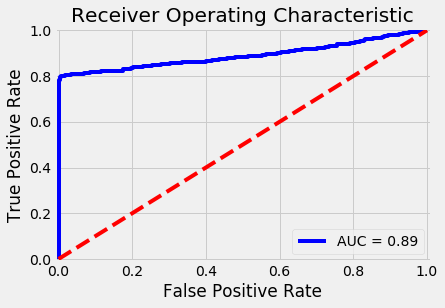

In [96]:
plot_roc_curve(test_target, probs_log)

In [97]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 train_new, 
                                                                                                 train_target_new, 
                                                                                                 test_data, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 94.27
Accuracy CV 10-Fold: 96.92
Running Time: 0:13:14.751508


In [98]:
print (metrics.classification_report(train_target_new, train_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    552822
         1.0       0.94      1.00      0.97    552822

   micro avg       0.97      0.97      0.97   1105644
   macro avg       0.97      0.97      0.97   1105644
weighted avg       0.97      0.97      0.97   1105644



In [99]:
print (metrics.classification_report(test_target, test_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    256680
         1.0       0.02      0.74      0.03       311

   micro avg       0.94      0.94      0.94    256991
   macro avg       0.51      0.84      0.50    256991
weighted avg       1.00      0.94      0.97    256991



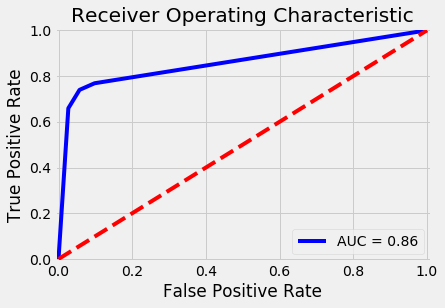

In [100]:
plot_roc_curve(test_target, probs_knn)

In [101]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     train_new, 
                                                                                     train_target_new, 
                                                                                     test_data, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 82.37
Accuracy CV 10-Fold: 84.05
Running Time: 0:01:12.048852


In [102]:
print (metrics.classification_report(train_target_new, train_pred_gaussian)) 

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82    552822
         1.0       0.78      0.95      0.86    552822

   micro avg       0.84      0.84      0.84   1105644
   macro avg       0.86      0.84      0.84   1105644
weighted avg       0.86      0.84      0.84   1105644



In [103]:
print (metrics.classification_report(test_target, test_pred_gaussian)) 

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90    256680
         1.0       0.01      0.83      0.01       311

   micro avg       0.82      0.82      0.82    256991
   macro avg       0.50      0.83      0.46    256991
weighted avg       1.00      0.82      0.90    256991



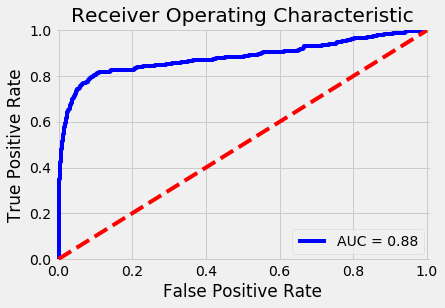

In [104]:
plot_roc_curve(test_target, probs_gau)

In [105]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           train_new, 
                                                                                           train_target_new,
                                                                                           test_data, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 73.39
Accuracy CV 10-Fold: 89.93
Running Time: 0:23:03.089764


In [106]:
print (metrics.classification_report(train_target_new, train_pred_svc))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90    552822
         1.0       0.89      0.91      0.90    552822

   micro avg       0.90      0.90      0.90   1105644
   macro avg       0.90      0.90      0.90   1105644
weighted avg       0.90      0.90      0.90   1105644



In [107]:
print (metrics.classification_report(test_target, test_pred_svc)) 

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85    256680
         1.0       0.00      0.83      0.01       311

   micro avg       0.73      0.73      0.73    256991
   macro avg       0.50      0.78      0.43    256991
weighted avg       1.00      0.73      0.85    256991



In [108]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             train_new, 
                                                             train_target_new, 
                                                             test_data, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 66.79
Accuracy CV 10-Fold: 97.5
Running Time: 0:06:31.606339


In [113]:
print (metrics.classification_report(train_target_new, train_pred_dt))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    552822
         1.0       0.98      0.97      0.97    552822

   micro avg       0.97      0.97      0.97   1105644
   macro avg       0.97      0.97      0.97   1105644
weighted avg       0.97      0.97      0.97   1105644



In [114]:
print (metrics.classification_report(test_target, test_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80    256680
         1.0       0.00      0.93      0.01       311

   micro avg       0.67      0.67      0.67    256991
   macro avg       0.50      0.80      0.40    256991
weighted avg       1.00      0.67      0.80    256991



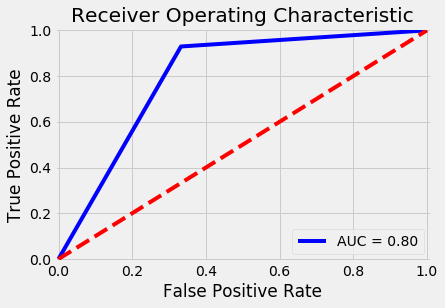

In [115]:
plot_roc_curve(test_target, probs_dt)

In [119]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 train_new, 
                                                                 train_target_new, 
                                                                 test_data, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 91.8
Accuracy CV 10-Fold: 98.36
Running Time: 1:40:13.614813


In [120]:
print (metrics.classification_report(train_target_new, train_pred_gbt)) 

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    552822
         1.0       0.99      0.98      0.98    552822

   micro avg       0.98      0.98      0.98   1105644
   macro avg       0.98      0.98      0.98   1105644
weighted avg       0.98      0.98      0.98   1105644



In [121]:
print (metrics.classification_report(test_target, test_pred_gbt))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96    256680
         1.0       0.01      0.87      0.03       311

   micro avg       0.92      0.92      0.92    256991
   macro avg       0.51      0.89      0.49    256991
weighted avg       1.00      0.92      0.96    256991



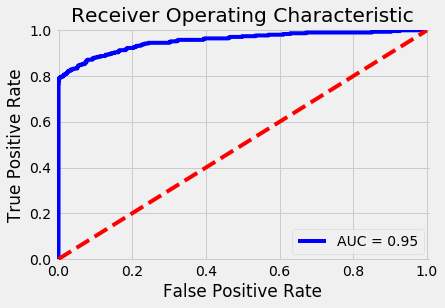

In [122]:
plot_roc_curve(test_target, probs_gbt)

In [123]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
               'Naive Bayes', 'Decision Tree', 'Linear SVC','Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_gaussian, 
        acc_dt,
        acc_linear_svc,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,97.85
0,KNN,94.27
5,Gradient Boosting Trees,91.80
2,Naive Bayes,82.37
4,Linear SVC,73.39
3,Decision Tree,66.79


In [124]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Naive Bayes','Decision Tree','Linear SVC', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_gaussian, 
        acc_cv_dt,
        acc_cv_linear_svc,
        acc_cv_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Gradient Boosting Trees,98.36
3,Decision Tree,97.50
0,KNN,96.92
1,Logistic Regression,96.16
4,Linear SVC,89.93
2,Naive Bayes,84.05


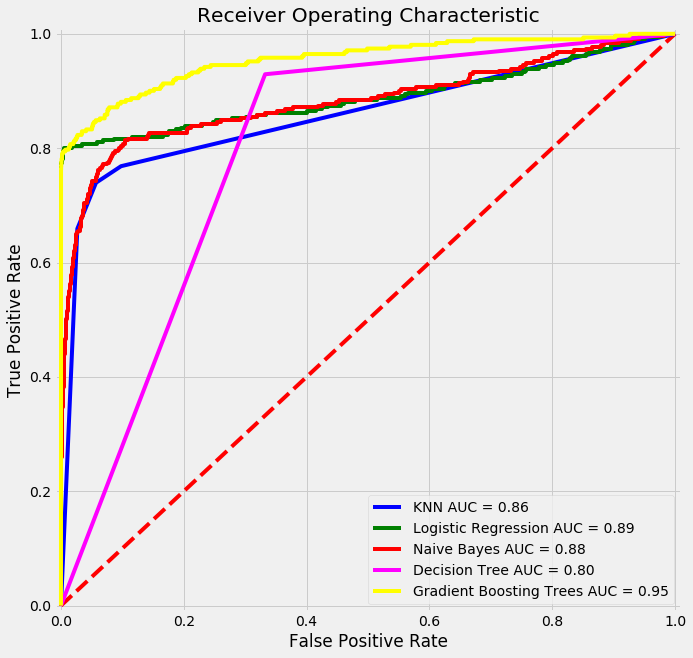

In [125]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Naive Bayes', 
    'Decision Tree',
    'Gradient Boosting Trees'
    
]
probs = [
    probs_knn,
    probs_log,
    probs_gau,
    probs_dt,
    probs_gbt
    
]
colors = [
    'blue',
    'green',
    'red',
    'magenta',
    'yellow',
    
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(test_target, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(test_target, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(test_target, probs[i], models[i])
    
plt.show()

# Extra

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [ ]:
select.fit(train,train_target)


In [ ]:
X_train_s = select.transform(train)


In [ ]:
print('The shape of train is: ', train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

In [ ]:
X_train_s =pd.DataFrame(X_train_s)

In [ ]:
X_train_s.head()


In [ ]:
train.head()


In [ ]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(train,train_target)

for n,s in zip(train,Selector_f.scores_):
    print('F-score:', (s,n))